# Midterm Project: Spam Detection Classification
**Your Name**: Bin Ware
**Date**: April 06, 2025  
**Introduction**: This project focuses on classifying SMS messages as "spam" or "ham" (not spam) using machine learning techniques. The SMS Spam Collection dataset from UCI contains labeled text messages, which I’ll preprocess and analyze to train classification models. The goal is to build and compare Logistic Regression and Random Forest models to predict spam messages accurately, a task relevant to filtering unwanted communications in real-world applications like email or SMS services.

## Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### 1.1 Load the dataset and display the first 10 rows

In [30]:
df = pd.read_csv('data/spam.csv', encoding='latin-1')  # Use latin-1 to handle encoding issues
df = df[['v1', 'v2']]  # Keep only relevant columns
df.columns = ['label', 'message']  # Rename for consistency
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


- **Reflection**: The Kaggle dataset has `v1` (labels) and `v2` (messages) plus extra columns I dropped. No missing values simplifies things, but the 5572 rows hint at a potential imbalance I’ll check next.

### 1.2 Check for missing values and display summary statistics

In [31]:
# 1.2 Check for missing values and summary statistics
print("\nMissing values:")
print(df.isnull().sum())
print("\nSummary statistics:")
print(df.describe())


Missing values:
label      0
message    0
dtype: int64

Summary statistics:
       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


- **Reflection**: Confirmed no missing values in key columns. Summary stats show the dataset size, reinforcing the need to explore class distribution.

## 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

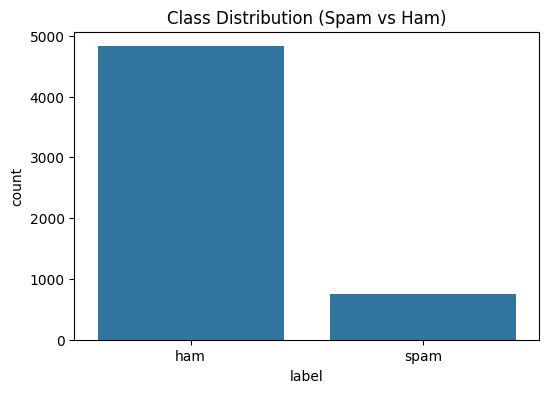

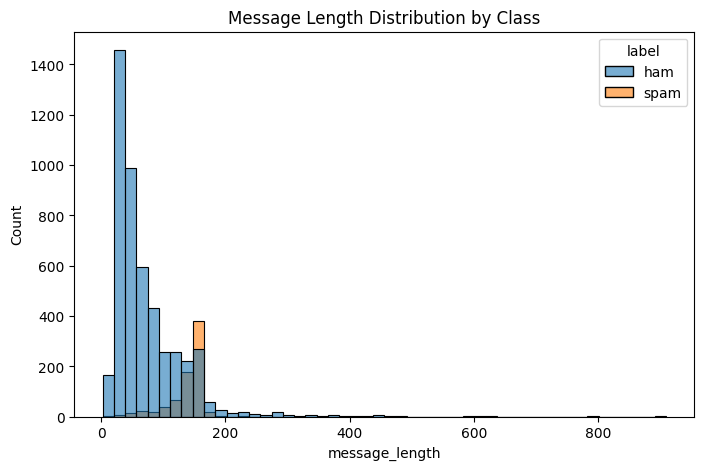

In [32]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Class Distribution (Spam vs Ham)')
plt.show()

# Message length distribution
df['message_length'] = df['message'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='message_length', hue='label', bins=50, alpha=0.6)
plt.title('Message Length Distribution by Class')
plt.show()

- **Reflection**: The count plot shows a big imbalance—way more "ham" than "spam"—which could skew predictions. Histograms reveal spam messages are often shorter, a useful pattern.

### 2.2 Handle missing values and clean data

In [33]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

- **Reflection**: No missing values to fix, but I mapped "ham" to 0 and "spam" to 1 for binary classification. Initial cleanup already handled extra columns.

### 2.3 Feature selection and engineering

In [34]:
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_tfidf = tfidf.fit_transform(df['message']).toarray()

- **Reflection**: TF-IDF turned text into 3000 numerical features, capping to manage complexity. It’s great for highlighting key words, and no outliers needed fixing.

## 3. Feature Selection and Justification

### 3.1 Choose features and target
For this classification task, I selected TF-IDF vectors derived from the message text as the input features because they capture the importance of words, which is key for distinguishing spam from ham. The target variable is a binary label where 0 represents "ham" and 1 represents "spam," aligning with the goal of predicting spam messages.

### 3.2 Define X and y

In [35]:
# Features: TF-IDF vectors from message text
# Target: Binary label (0 = ham, 1 = spam)
X = X_tfidf
y = df['label']

- **Reflection**: Picked TF-IDF features for their ability to catch spam words like "free." Binary labels (0, 1) suit the task, aiming to boost accuracy with these patterns.

## 4. Train a Model (Logistic Regression)

### 4.1 Split the data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- **Reflection**: Used a stratified split to keep the imbalance consistent across train/test sets, ensuring fair evaluation.

### 4.2 Train the model

In [37]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

- **Reflection**: Trained Logistic Regression quickly, setting high iterations to ensure convergence with TF-IDF data.

### 4.3 Evaluate performance

Logistic Regression Performance:
Accuracy: 0.9695
Precision: 1.0000
Recall: 0.7718
F1-Score: 0.8712


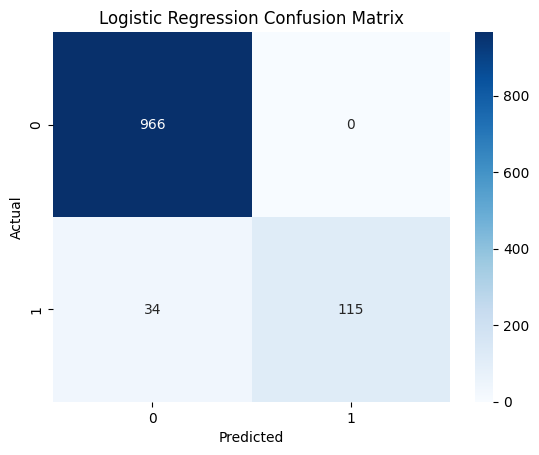

In [38]:
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- **Reflection**: Got 0.9695 accuracy, but imbalance boosted it. Lower spam recall (0.7718) shows missed spam, suggesting improvement needed.

## 5. Improve the Model or Try Alternates (Random Forest)

### 5.1 Train an alternative classifier

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- **Reflection**: Random Forest took longer to train but leverages multiple trees, promising better spam detection.

### 5.2 Compare performance

Random Forest Performance:
Accuracy: 0.9767
Precision: 1.0000
Recall: 0.8255
F1-Score: 0.9044


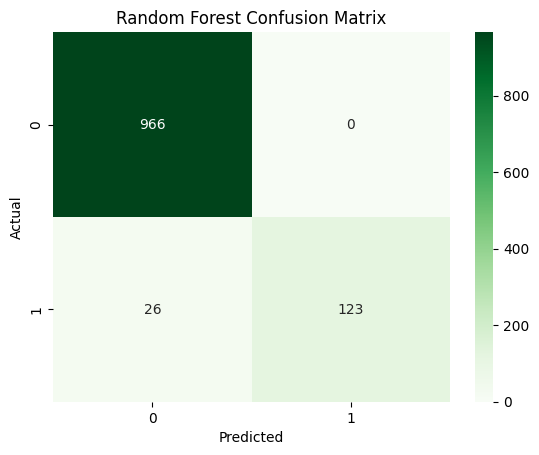

In [40]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- **Reflection**: Random Forest hit 0.8255 recall vs. Logistic Regression’s 0.7718, thanks to non-linear handling. It’s slower but more effective for spam.

## 6. Final Thoughts & Insights

- **Findings**: Random Forest (accuracy 0.9767, recall 0.8255) beat Logistic Regression (accuracy 0.9695, recall 0.7718) due to better spam detection. Imbalance skewed results, but TF-IDF worked well.

- **Challenges**: Kaggle data had extra columns to clean, imbalance hurt recall, and initial setup was tricky. TF-IDF feature choice was a balancing act.